In [139]:
clf_names = ["CART", "EBM", "GNB", "LR", "LR_l2", "DL"]
dataset_names = ['breast', 'campus', 'churn', 'climate',
            'compas', 'diabetes', 'german', 'heart',
            'adult', 'student', 'bank', 'credit']

In [140]:
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt 
def plot_losses(delimiter, loss_df):
    plt.figure(figsize=(13, 10))
    plt.plot(loss_df[:delimiter])
    plt.xlabel("Feature numbers")
    plt.ylabel("Normalized loss")
    plt.legend(loss_df.columns)
    plt.grid(True)
    plt.show()


def NormalizeData(data_avg):
    first = data_avg[0] 
    last = data_avg[data_avg.argmin()]
    return (np.subtract(data_avg, last) / np.subtract(first, last))*100

def calculate_losses(dataset_id):
    features_n = len(pd.read_csv(f"../test_results/feature_density/{clf_names[0]}_{dataset_names[dataset_id]}_{0}.csv"))
    fold_n = 10 
    clf_n = len(clf_names)
    results = np.zeros(shape=(fold_n, features_n))
    norm_results = np.zeros(shape=(clf_n, features_n))

    for clf_id in range(len(clf_names)):
        
        for i in range(fold_n):
            result_df= pd.read_csv(f"../test_results/feature_density/{clf_names[clf_id]}_{dataset_names[dataset_id]}_{i}.csv")
            results[i] = result_df["2"]
        
        result_df = pd.DataFrame(results)
        results_avg = result_df.mean()
        result_normalized = NormalizeData(results_avg)
        norm_results[clf_id] = result_normalized
    
    dict_results = {
        "CART": norm_results[0],
        "EBM": norm_results[1],
        "GNB": norm_results[2],
        "LR": norm_results[3],
        "LR_l2": norm_results[4],
        "DL": norm_results[5]
    }

    return dict_results

from numpy import trapz
def calculate_loss_auc(result_norm_df, delimiter):
    auc_losses = np.zeros(len(clf_names))

    for clf_id, clf in enumerate(clf_names):
        area = trapz(result_norm_df[clf][:delimiter])
        auc_losses[clf_id] = area/delimiter #divide beetwen number of features
    
    dict_auc_losses = {
            "CART": auc_losses[0],
            "EBM": auc_losses[1],
            "GNB": auc_losses[2],
            "LR": auc_losses[3],
            "LR_l2": auc_losses[4],
            "DL": auc_losses[5]
        }
    return dict_auc_losses

    

## 1. Breast Dataset

In [141]:
breast_data_results = calculate_losses(0)
breast_df_results = pd.DataFrame(breast_data_results)

In [142]:
breast_df_results

,CART,EBM,GNB,LR,LR_l2,DL
0,100.000000,1.000000e+02,100.000000,100.000000,100.000000,100.000000
1,42.686359,5.250772e+01,42.838986,53.090229,42.804584,100.000000
2,17.083186,3.217521e+01,19.669002,26.503228,19.027381,6.080975
3,8.563285,1.694865e+01,14.322112,9.354078,11.082785,1.520250
4,3.694807,1.018126e+01,10.725649,4.677021,9.499536,1.013496
5,3.694807,8.489429e+00,5.346891,4.677021,7.916249,0.506754
6,3.673072,3.383671e+00,3.564594,4.677021,6.332999,0.506754
7,2.455960,1.691836e+00,3.564594,1.559007,3.166500,1.013508
8,1.238847,0.000000e+00,3.564594,1.559007,3.166500,0.506754
9,2.434282,0.000000e+00,3.564594,1.559007,3.166500,0.000000


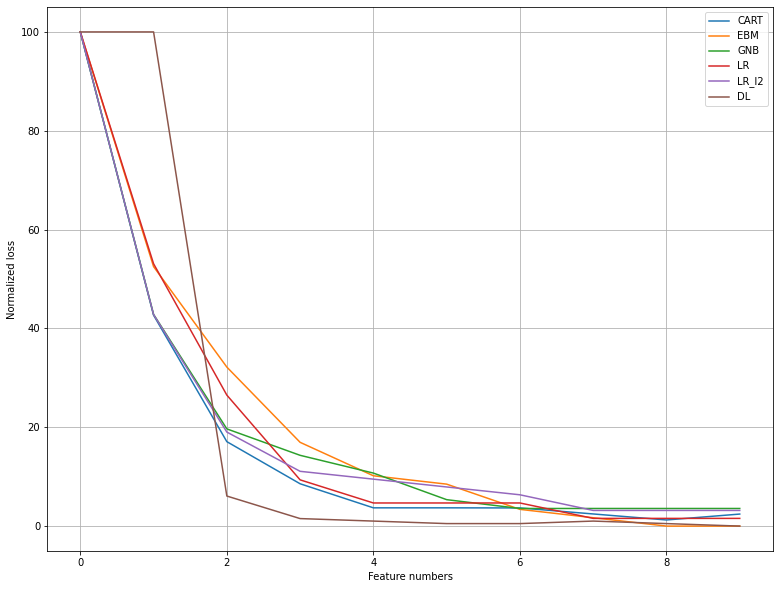

In [143]:
plot_losses(10, breast_df_results)

In [144]:
breast_auc_loss = calculate_loss_auc(breast_df_results, delimiter=10)
breast_auc_loss

{'CART': 13.430746344241342,
 'EBM': 17.53777709141698,
 'GNB': 15.53787181203592,
 'LR': 15.687611619206184,
 'LR_l2': 15.457978374480984,
 'DL': 16.11484897353979}